In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import matplotlib.pyplot as plt

# Function to fetch stock price using yfinance
def get_stock_price(ticker):
    stock = yf.Ticker(ticker)
    try:
        stock_info = stock.info
        price = stock_info.get('currentPrice')
        if price is None:
            # For debugging, print the keys available in the info dictionary
            print(f"No price for {ticker}, available keys: {stock_info.keys()}")
        return price
    except ValueError as e:
        print(f"Error retrieving info for {ticker}: {e}")
        return None

# Scrape data from MarketWatch
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:87.0) Gecko/20100101 Firefox/87.0',
}
url = 'https://www.marketwatch.com/tools/earningscalendar'
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

tables = soup.find_all('table')

# List to hold DataFrame objects for each ticker symbol
ticker_data_list = []

for i, table in enumerate(tables):
    if not table.find('tbody').find_all('tr'):
        continue

    earning_date = f'Earnings_{i+1}'
    print(earning_date)
    df = pd.read_html(str(table))[0]

    # Determine the release status based on the earnings number
    release_status = 'Yes' if i < 2 else 'No'  # 'Yes' for Earnings_1 and Earnings_2, 'No' for others

    # Add 'Released' column with the determined status
    df['Released'] = release_status

    # Extract and print ticker symbols if the column exists
    if 'Symbol' in df.columns:
        ticker_symbols = df['Symbol'].dropna().unique()
        print(f"Ticker Symbols in {earning_date}: {ticker_symbols}")

        # Fetch stock prices and append to the list of DataFrame objects
        for ticker in ticker_symbols:
            price = get_stock_price(ticker)
            ticker_data_list.append(pd.DataFrame({'Symbol': [ticker], 'Stock Price': [price], 'Released': [release_status]}))

# Concatenate all DataFrame objects into a single DataFrame
ticker_data = pd.concat(ticker_data_list, ignore_index=True)

# Filter out rows where 'Stock Price' is None or NaN
ticker_data = ticker_data.dropna(subset=['Stock Price'])

# Sort the DataFrame by stock price in descending order
ticker_data_sorted = ticker_data.sort_values(by='Stock Price', ascending=False)
print(ticker_data_sorted)


Earnings_1
Ticker Symbols in Earnings_1: ['LXEO' 'OCCI' 'UEC' 'ORCL' 'NOTV' 'CASY' 'BLBD']
Earnings_2
Ticker Symbols in Earnings_2: ['AGFY' 'CZMWY' 'JCI' 'EPIX' 'SST' 'CSBR' 'EMKR' 'MAMA' 'LPTV']
Earnings_3
Ticker Symbols in Earnings_3: ['IDEXF' 'VBNK' 'CGNT' 'ABM' 'PLAB' 'REVG' 'QSG' 'ASYS' 'MIND' 'STRM'
 'ADBE' 'ZDGE' 'NDSN']
Earnings_4
Ticker Symbols in Earnings_4: ['IPA' 'JBL' 'MLEC' 'LIVE' 'MESA' 'NMTC' 'LEN' 'LEN.B' 'SCHL' 'NX' 'COST']
No price for LEN.B, available keys: dict_keys(['exchange', 'quoteType', 'symbol', 'underlyingSymbol', 'timeZoneFullName', 'timeZoneShortName', 'uuid', 'gmtOffSetMilliseconds', 'maxAge', 'trailingPegRatio'])
Earnings_5
Ticker Symbols in Earnings_5: ['DRI']
   Symbol  Stock Price Released
26   ADBE     633.6600       No
39   COST     629.5000       No
5    CASY     272.6700      Yes
28   NDSN     237.8400       No
40    DRI     161.0800       No
35    LEN     140.5300       No
30    JBL     120.1500       No
8   CZMWY     101.5800      Yes
3    ORCL 

Options data for ADBE:
Market Sentiment for ADBE is leaning Bearish.
Average Implied Volatility for Calls: 0.03612557878867415
Average Implied Volatility for Puts: 0.23221531064583742
Number of ITM Call Options: 645
Number of ITM Put Options: 184
Options data for COST:
Market Sentiment for COST is leaning Bearish.
Average Implied Volatility for Calls: 0.017117551810005682
Average Implied Volatility for Puts: 0.16012911952489614
Number of ITM Call Options: 533
Number of ITM Put Options: 131
Options data for CASY:
Market Sentiment for CASY is leaning Bullish.
Average Implied Volatility for Calls: 0.13578539902735884
Average Implied Volatility for Puts: 0.39006534643027563
Number of ITM Call Options: 24
Number of ITM Put Options: 17


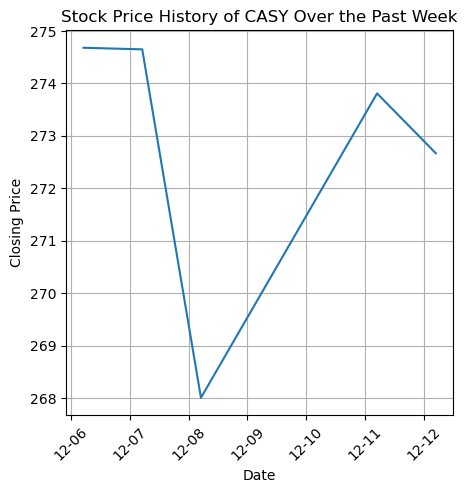

Options data for NDSN:
Market Sentiment for NDSN is leaning Bullish.
Average Implied Volatility for Calls: 0.30969407807228777
Average Implied Volatility for Puts: 0.40899268618011475
Number of ITM Call Options: 7
Number of ITM Put Options: 8
Options data for DRI:
Market Sentiment for DRI is leaning Bearish.
Average Implied Volatility for Calls: 0.10557422261297364
Average Implied Volatility for Puts: 0.2425686658963405
Number of ITM Call Options: 79
Number of ITM Put Options: 30
Options data for LEN:
Market Sentiment for LEN is leaning Bearish.
Average Implied Volatility for Calls: 0.04725045776671806
Average Implied Volatility for Puts: 0.22372897951918175
Number of ITM Call Options: 255
Number of ITM Put Options: 45
Options data for JBL:
Market Sentiment for JBL is leaning Bearish.
Average Implied Volatility for Calls: 0.20881640238132435
Average Implied Volatility for Puts: 0.24542218748068587
Number of ITM Call Options: 72
Number of ITM Put Options: 51
Options data for CZMWY:
Mark

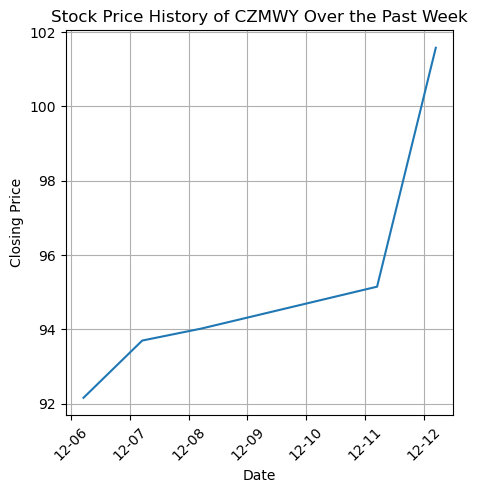

Options data for ORCL:
Market Sentiment for ORCL is leaning Bullish.
Average Implied Volatility for Calls: 0.18241775559427678
Average Implied Volatility for Puts: 0.06830104335749118
Number of ITM Call Options: 168
Number of ITM Put Options: 235


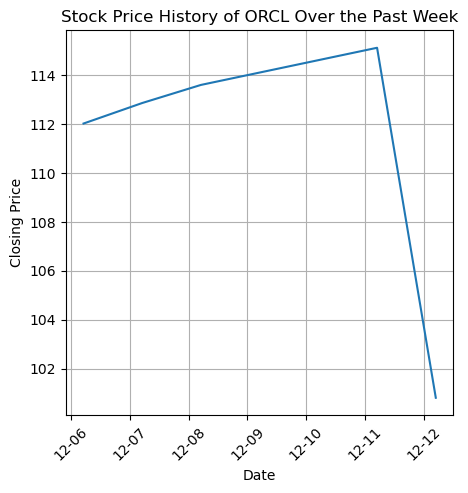

Options data for JCI:
Market Sentiment for JCI is leaning Bullish.
Average Implied Volatility for Calls: 0.18742708612186687
Average Implied Volatility for Puts: 0.1534395084954464
Number of ITM Call Options: 54
Number of ITM Put Options: 53


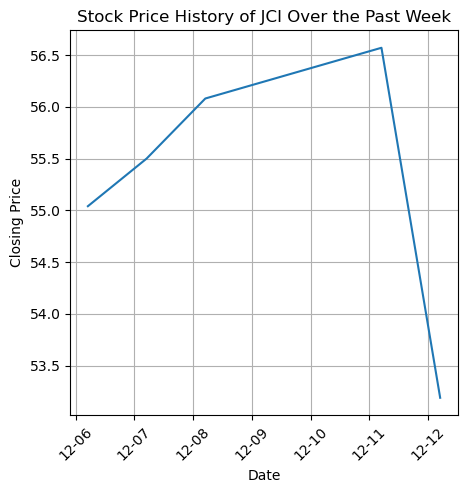

Options data for ABM:
Market Sentiment for ABM is leaning Bearish.
Average Implied Volatility for Calls: nan
Average Implied Volatility for Puts: 0.319917486114502
Number of ITM Call Options: 6
Number of ITM Put Options: 5
Options data for IDEXF:
Market Sentiment for IDEXF is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0
Options data for SCHL:
Market Sentiment for SCHL is leaning Bullish.
Average Implied Volatility for Calls: nan
Average Implied Volatility for Puts: nan
Number of ITM Call Options: 3
Number of ITM Put Options: 6
Options data for NX:
Market Sentiment for NX is leaning Bullish.
Average Implied Volatility for Calls: 0.06585610260009767
Average Implied Volatility for Puts: 0.578965030517578
Number of ITM Call Options: 7
Number of ITM Put Options: 1
Options data for BLBD:
Market Sentiment for BLBD is leaning Bullish.
Average Implied Volatility for Calls: 0.00990573437

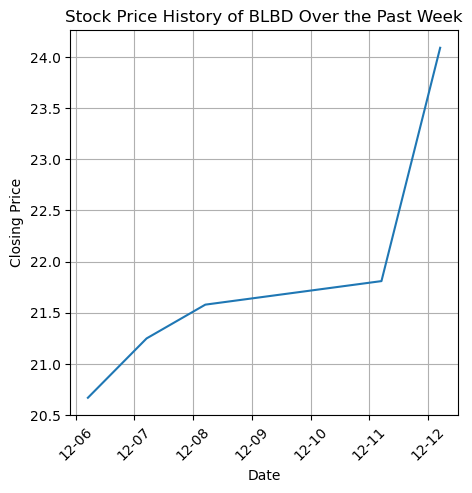

Options data for LIVE:
Market Sentiment for LIVE is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0
Options data for PLAB:
Market Sentiment for PLAB is leaning Bullish.
Average Implied Volatility for Calls: 0.60219561769322
Average Implied Volatility for Puts: 0.30566744092668807
Number of ITM Call Options: 17
Number of ITM Put Options: 7
Options data for REVG:
Market Sentiment for REVG is leaning Bearish.
Average Implied Volatility for Calls: 0.23763875813802082
Average Implied Volatility for Puts: 0.6313801597764758
Number of ITM Call Options: 7
Number of ITM Put Options: 2
Options data for LXEO:
Market Sentiment for LXEO is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


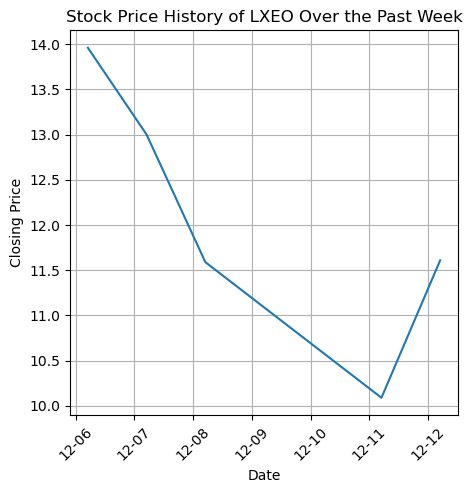

Options data for VBNK:
Market Sentiment for VBNK is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0
Options data for UEC:
Market Sentiment for UEC is leaning Bullish.
Average Implied Volatility for Calls: 0.07467622467983086
Average Implied Volatility for Puts: 0.3383621693694099
Number of ITM Call Options: 69
Number of ITM Put Options: 27


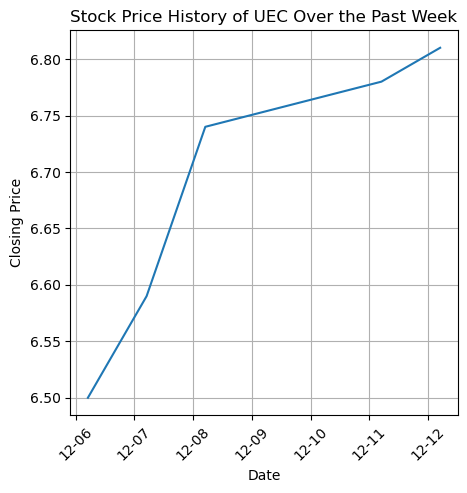

Options data for OCCI:
Market Sentiment for OCCI is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


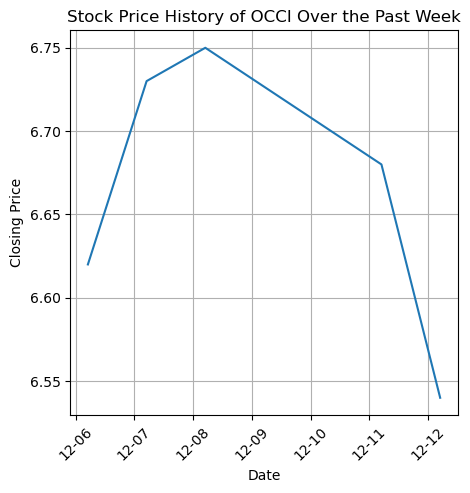

Options data for ASYS:
Market Sentiment for ASYS is leaning Bullish.
Average Implied Volatility for Calls: 0.42302108805338545
Average Implied Volatility for Puts: 0.101571484375
Number of ITM Call Options: 3
Number of ITM Put Options: 4
Options data for CGNT:
Market Sentiment for CGNT is leaning Bullish.
Average Implied Volatility for Calls: 0.08594664062500001
Average Implied Volatility for Puts: nan
Number of ITM Call Options: 6
Number of ITM Put Options: 1
Options data for MIND:
Market Sentiment for MIND is leaning Bullish.
Average Implied Volatility for Calls: 0.5293055517578125
Average Implied Volatility for Puts: nan
Number of ITM Call Options: 3
Number of ITM Put Options: 0
Options data for EPIX:
Market Sentiment for EPIX is leaning Bullish.
Average Implied Volatility for Calls: 0.145841875
Average Implied Volatility for Puts: 0.216153671875
Number of ITM Call Options: 6
Number of ITM Put Options: 2


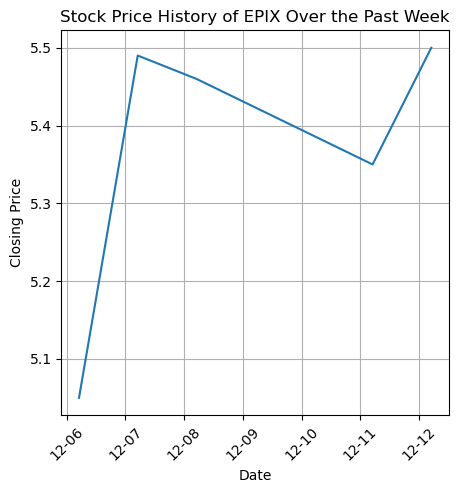

Options data for CSBR:
Market Sentiment for CSBR is leaning Bullish.
Average Implied Volatility for Calls: 0.6137766914876304
Average Implied Volatility for Puts: 0.4156983862304688
Number of ITM Call Options: 0
Number of ITM Put Options: 7


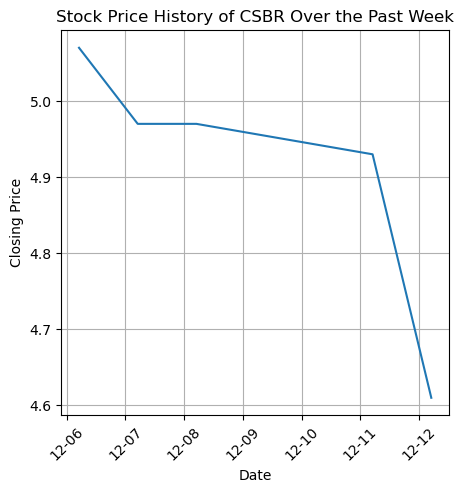

Options data for MAMA:
Market Sentiment for MAMA is leaning Bullish.
Average Implied Volatility for Calls: 0.191088818359375
Average Implied Volatility for Puts: 0.17115086669921875
Number of ITM Call Options: 4
Number of ITM Put Options: 5


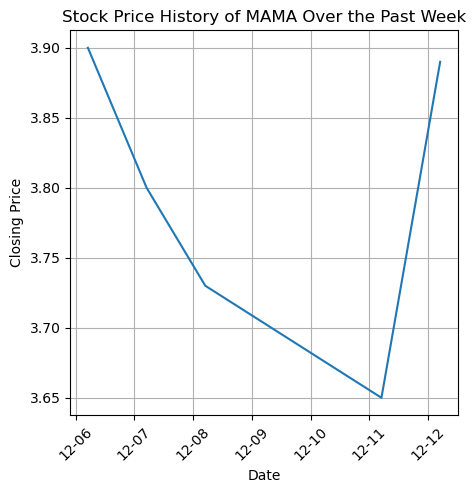

Options data for NOTV:
Market Sentiment for NOTV is leaning Bullish.
Average Implied Volatility for Calls: 2.537837736616655
Average Implied Volatility for Puts: 0.11459272135416668
Number of ITM Call Options: 4
Number of ITM Put Options: 10


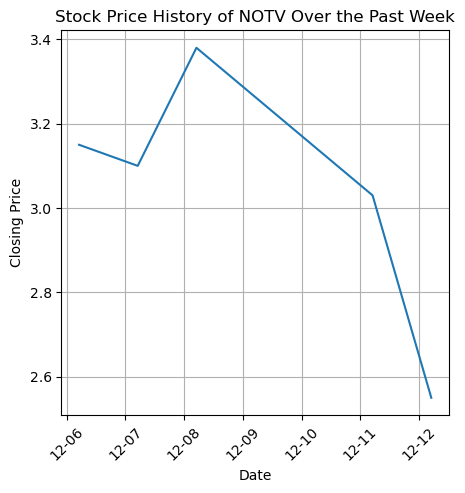

Options data for MLEC:
Market Sentiment for MLEC is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0
Options data for SST:
Market Sentiment for SST is leaning Bullish.
Average Implied Volatility for Calls: 0.9371490306857639
Average Implied Volatility for Puts: nan
Number of ITM Call Options: 0
Number of ITM Put Options: 21


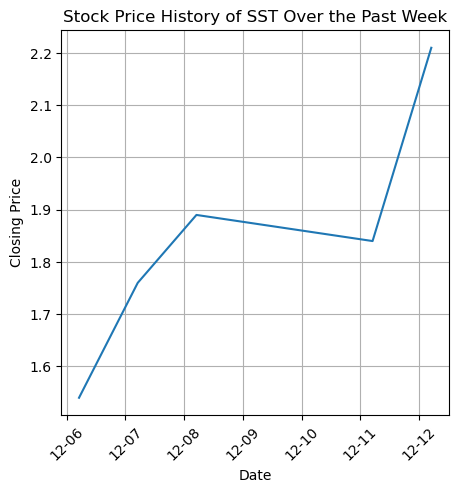

Options data for QSG:
Market Sentiment for QSG is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0
Options data for ZDGE:
Market Sentiment for ZDGE is leaning Bullish.
Average Implied Volatility for Calls: 0.9256654333496094
Average Implied Volatility for Puts: nan
Number of ITM Call Options: 3
Number of ITM Put Options: 1
Options data for NMTC:
Market Sentiment for NMTC is leaning Bullish.
Average Implied Volatility for Calls: 0.45833875
Average Implied Volatility for Puts: nan
Number of ITM Call Options: 0
Number of ITM Put Options: 2
Options data for AGFY:
Market Sentiment for AGFY is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


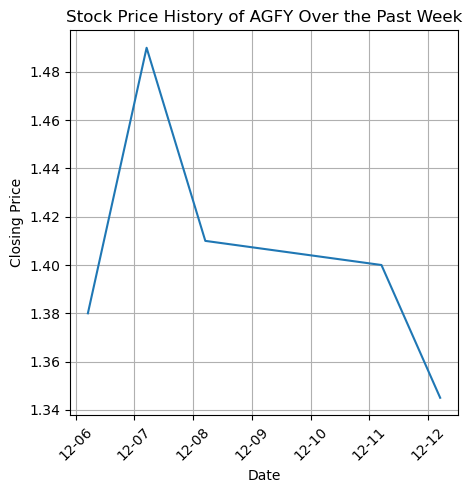

Options data for LPTV:
Market Sentiment for LPTV is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


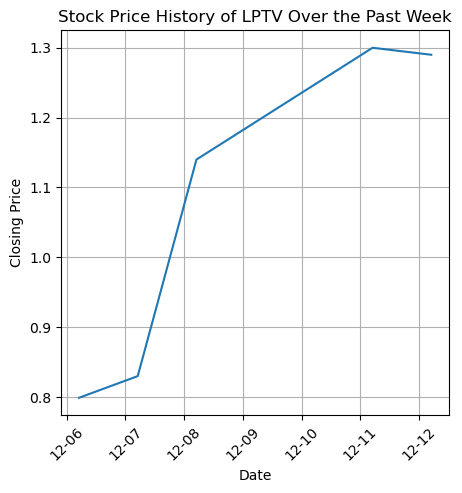

Options data for MESA:
Market Sentiment for MESA is leaning Bullish.
Average Implied Volatility for Calls: 0.97005705078125
Average Implied Volatility for Puts: 0.4541104272460938
Number of ITM Call Options: 0
Number of ITM Put Options: 6
Options data for IPA:
Market Sentiment for IPA is leaning Bullish.
Average Implied Volatility for Calls: 1.412244419921875
Average Implied Volatility for Puts: 0.8808666455078126
Number of ITM Call Options: 0
Number of ITM Put Options: 9
Options data for EMKR:
Market Sentiment for EMKR is leaning Bullish.
Average Implied Volatility for Calls: 2.750004375
Average Implied Volatility for Puts: 3.4166745312500004
Number of ITM Call Options: 0
Number of ITM Put Options: 4


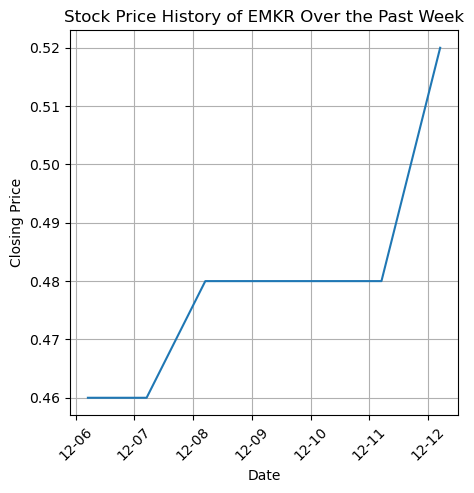

Options data for STRM:
Market Sentiment for STRM is leaning Bearish.
Average Implied Volatility for Calls: 0
Average Implied Volatility for Puts: 0
Number of ITM Call Options: 0
Number of ITM Put Options: 0


In [27]:
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Set the time frame for the past week
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    released = row['Released']

    stock = yf.Ticker(ticker)

    # Initialize variables for options data
    total_call_volume, total_call_open_interest, total_call_implied_volatility = 0, 0, 0
    total_put_volume, total_put_open_interest, total_put_implied_volatility = 0, 0, 0
    total_itm_calls, total_itm_puts = 0, 0
    exp_dates_count = 0

    # Get options expiration dates
    exp_dates = stock.options

    # Retrieve and analyze options data for each expiration date
    for date in exp_dates:
        options_data = stock.option_chain(date)
        call_options, put_options = options_data.calls, options_data.puts

        # Aggregate call and put metrics
        total_call_volume += call_options['volume'].sum()
        total_call_open_interest += call_options['openInterest'].sum()
        total_call_implied_volatility += call_options['impliedVolatility'].mean()

        total_put_volume += put_options['volume'].sum()
        total_put_open_interest += put_options['openInterest'].sum()
        total_put_implied_volatility += put_options['impliedVolatility'].mean()

        # Count ITM options
        total_itm_calls += call_options[call_options['inTheMoney']].shape[0]
        total_itm_puts += put_options[put_options['inTheMoney']].shape[0]

        exp_dates_count += 1

    # Averaging implied volatility over all expiration dates
    if exp_dates_count > 0:
        avg_call_implied_volatility = total_call_implied_volatility / exp_dates_count
        avg_put_implied_volatility = total_put_implied_volatility / exp_dates_count
    else:
        avg_call_implied_volatility = avg_put_implied_volatility = 0

    # Market Sentiment
    sentiment = "Bullish" if total_call_volume + total_call_open_interest > total_put_volume + total_put_open_interest else "Bearish"
    print(f"===========================================")
    print(f"Options data for {ticker}:")
    print(f"Market Sentiment for {ticker} is leaning {sentiment}.")

    # Implied Volatility and ITM Options
    print(f"Average Implied Volatility for Calls: {avg_call_implied_volatility}")
    print(f"Average Implied Volatility for Puts: {avg_put_implied_volatility}")
    print(f"Number of ITM Call Options: {total_itm_calls}")
    print(f"Number of ITM Put Options: {total_itm_puts}")

    # Plot only if earnings have been released
    if released == 'Yes':

        # Fetching and plotting stock price history
        hist = stock.history(start=start_date, end=end_date)

        # Plotting the closing prices
        plt.figure(figsize=(5, 5))
        plt.plot(hist.index, hist['Close'])
        plt.title(f"Stock Price History of {ticker} Over the Past Week")

        # Formatting the x-axis to show the date without the year
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Format as 'Month-Day'
        plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Set major ticks to days
        plt.xticks(rotation=45)  # Rotate for better readability

        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.grid(True)
        plt.show()


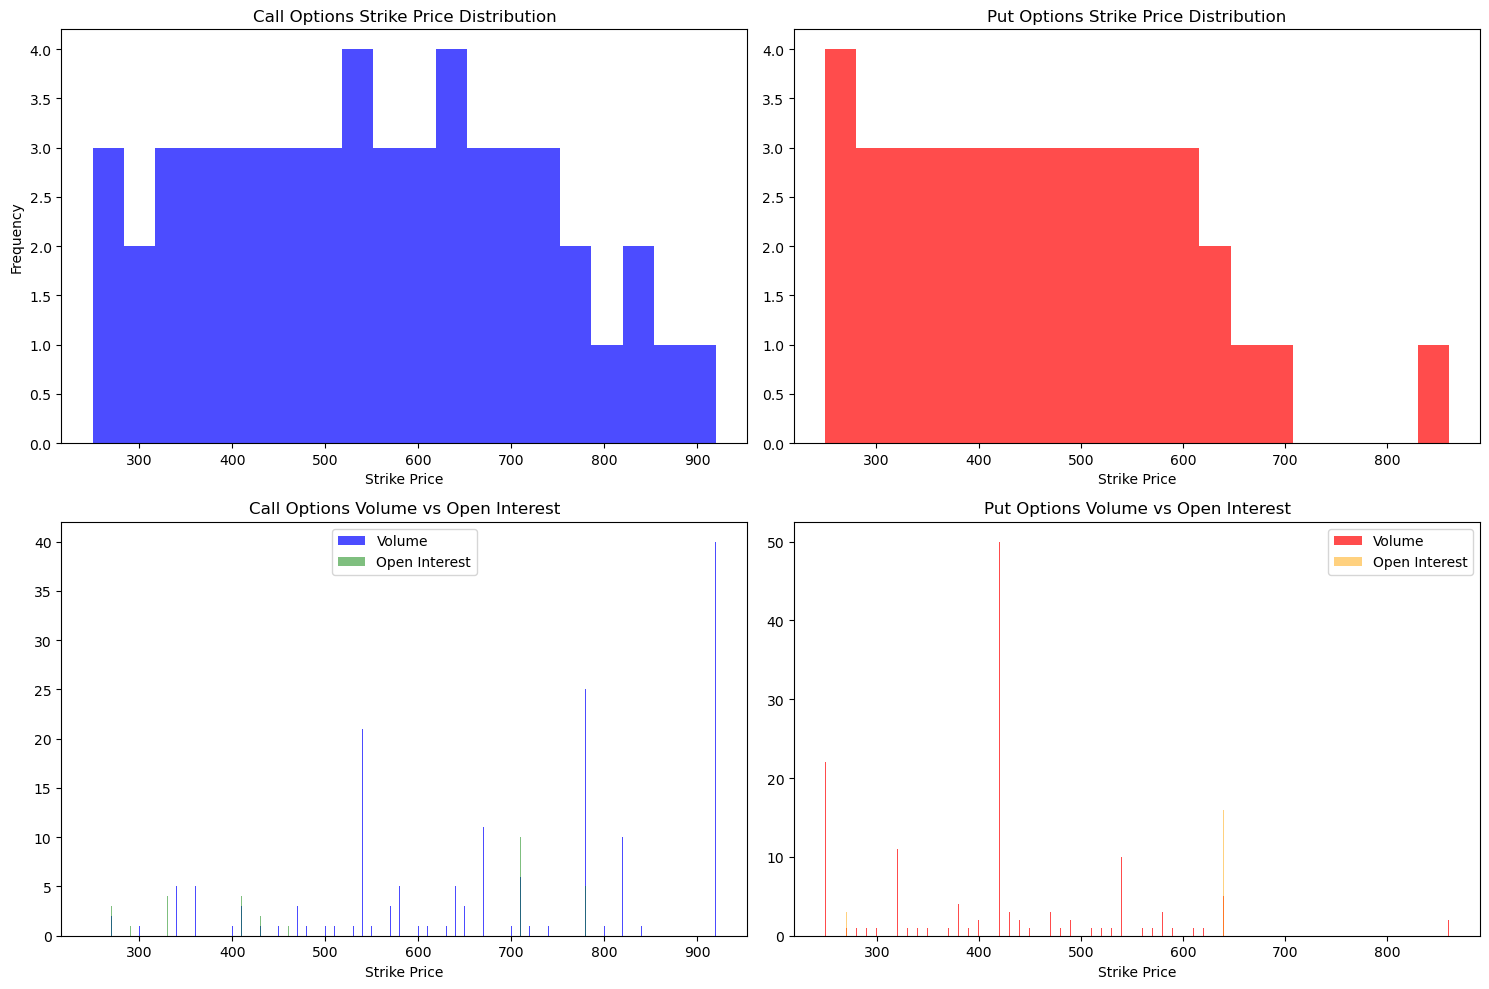

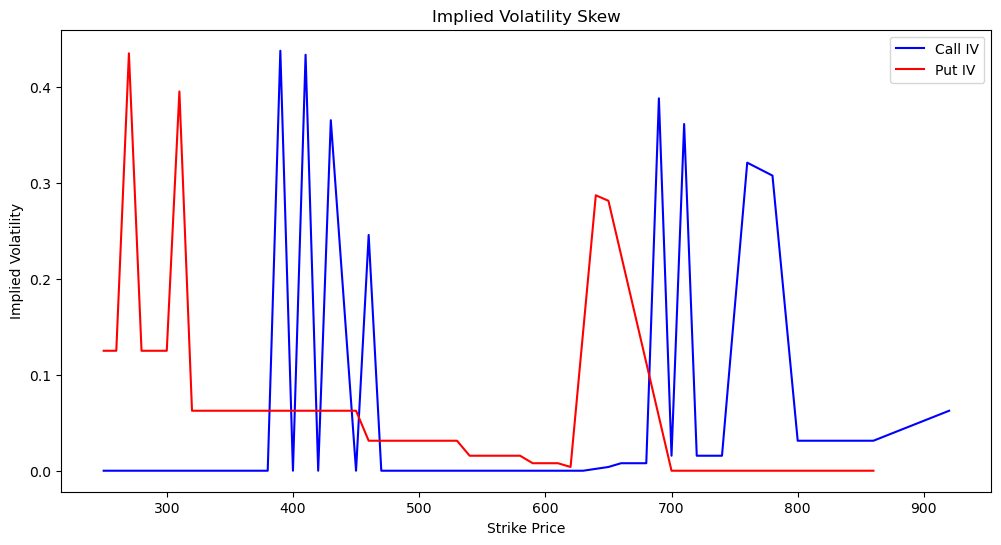

ITM Calls: 35, OTM Calls: 18
ITM Puts: 4, OTM Puts: 38


In [3]:
import matplotlib.pyplot as plt

# Assuming call_options and put_options are defined and contain the options data

# Setting up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Strike Price Distribution for Calls
axs[0, 0].hist(call_options['strike'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Call Options Strike Price Distribution')
axs[0, 0].set_xlabel('Strike Price')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: Strike Price Distribution for Puts
axs[0, 1].hist(put_options['strike'], bins=20, color='red', alpha=0.7)
axs[0, 1].set_title('Put Options Strike Price Distribution')
axs[0, 1].set_xlabel('Strike Price')

# Plot 3: Volume vs Open Interest for Calls
axs[1, 0].bar(call_options['strike'], call_options['volume'], color='blue', alpha=0.7, label='Volume')
axs[1, 0].bar(call_options['strike'], call_options['openInterest'], color='green', alpha=0.5, label='Open Interest')
axs[1, 0].set_title('Call Options Volume vs Open Interest')
axs[1, 0].set_xlabel('Strike Price')
axs[1, 0].legend()

# Plot 4: Volume vs Open Interest for Puts
axs[1, 1].bar(put_options['strike'], put_options['volume'], color='red', alpha=0.7, label='Volume')
axs[1, 1].bar(put_options['strike'], put_options['openInterest'], color='orange', alpha=0.5, label='Open Interest')
axs[1, 1].set_title('Put Options Volume vs Open Interest')
axs[1, 1].set_xlabel('Strike Price')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# Implied Volatility Skew
plt.figure(figsize=(12, 6))
plt.plot(call_options['strike'], call_options['impliedVolatility'], label='Call IV', color='blue')
plt.plot(put_options['strike'], put_options['impliedVolatility'], label='Put IV', color='red')
plt.title('Implied Volatility Skew')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

# Moneyness of Options
itm_calls_count = call_options[call_options['inTheMoney']].shape[0]
otm_calls_count = call_options[~call_options['inTheMoney']].shape[0]
itm_puts_count = put_options[put_options['inTheMoney']].shape[0]
otm_puts_count = put_options[~put_options['inTheMoney']].shape[0]

print(f"ITM Calls: {itm_calls_count}, OTM Calls: {otm_calls_count}")
print(f"ITM Puts: {itm_puts_count}, OTM Puts: {otm_puts_count}")
